<a href="https://colab.research.google.com/github/shivamswarnkar/Image-Classifier/blob/master/MNIST_Fashion_classifier_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data and setup Train/Test loader

In [0]:
import torch
from torchvision import datasets, transforms

# Define Transform
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:00, 74538718.66it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 588366.80it/s]
  2%|▏         | 106496/4422102 [00:00<00:04, 1029109.16it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:00, 23316898.44it/s]                           
8192it [00:00, 178842.40it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


# Util Functions

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


In [0]:
# util function to display image next to predicted probabilities
def view_classify(img, ps, actual_digit=None):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Digit vs Predicted Probabilities')
  ax1.imshow(img.view(1,28,28).squeeze(), cmap="Greys_r")
  ax1.title.set_text(f'Actual Digit={actual_digit}')
  ax2.barh(range(10), ps.numpy().squeeze())

# Building Network

In [0]:
from torch import nn
import torch.nn.functional as F

In [0]:
# Define Network
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

# Training Network

In [0]:
# Hypter Params
lr = 0.01
epochs = 25

# Setup Loss
criterion = nn.NLLLoss()

# Setup Optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [26]:
# train
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # flatten images
    images = images.view(images.shape[0], -1)
    
    # set gradients to zero
    optimizer.zero_grad()

    # feedforward, calculate loss
    loss = criterion(model(images), labels)

    # backprop
    loss.backward()

    # update weights and bias
    optimizer.step()
    
    # add loss to running_loss
    running_loss += loss.item()
  print(f'Epoch {e}: Running Loss={running_loss}.')

Epoch 0: Running Loss=239.11737993359566.
Epoch 1: Running Loss=235.71011880785227.
Epoch 2: Running Loss=231.62526887655258.
Epoch 3: Running Loss=227.0419411584735.
Epoch 4: Running Loss=222.62489572167397.
Epoch 5: Running Loss=218.06470170617104.
Epoch 6: Running Loss=216.60805854201317.
Epoch 7: Running Loss=210.53046046197414.
Epoch 8: Running Loss=207.79009917378426.
Epoch 9: Running Loss=205.19810389727354.
Epoch 10: Running Loss=199.96503360196948.
Epoch 11: Running Loss=196.89602871611714.
Epoch 12: Running Loss=192.77516868710518.
Epoch 13: Running Loss=189.4103979319334.
Epoch 14: Running Loss=186.91174062341452.
Epoch 15: Running Loss=183.06090028584003.
Epoch 16: Running Loss=179.38035134226084.
Epoch 17: Running Loss=177.69546158611774.
Epoch 18: Running Loss=174.90508329868317.
Epoch 19: Running Loss=171.57292848825455.
Epoch 20: Running Loss=168.2996092736721.
Epoch 21: Running Loss=166.2340177744627.
Epoch 22: Running Loss=162.7568748369813.
Epoch 23: Running Loss=158

# Test Network

tensor([[2.0238e-03, 1.1985e-03, 1.9218e-05, 9.9398e-01, 6.2952e-04, 1.4439e-05,
         2.0077e-03, 2.2137e-07, 8.3144e-05, 4.4063e-05]])


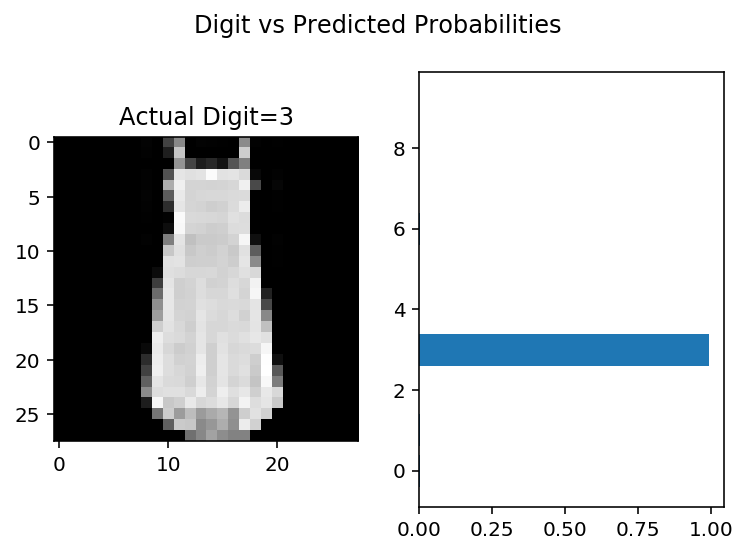

In [25]:
# Display a random image with prob
with torch.no_grad():
  images, labels = iter(testloader).next()
  ps = torch.exp(model(images[0].view(-1, 784)))
  print(ps)
  view_classify(images[0], ps, labels[0])

In [27]:
# Calculate Accuracy on Test Data
wrong_classified = 0
with torch.no_grad():
  for images, labels in testloader:
    # flatten image
    _, predicted_labels = torch.exp(model(images.view(images.shape[0], -1))).max(dim=1)
    wrong_classified += len((labels-predicted_labels).nonzero())

print(f'Model Accuracy:{round(100-(wrong_classified/(64*len(trainloader)))*100, 3)}%')
print(f'Total Wrong classified: {wrong_classified}')

Model Accuracy:97.901%
Total Wrong classified: 1260


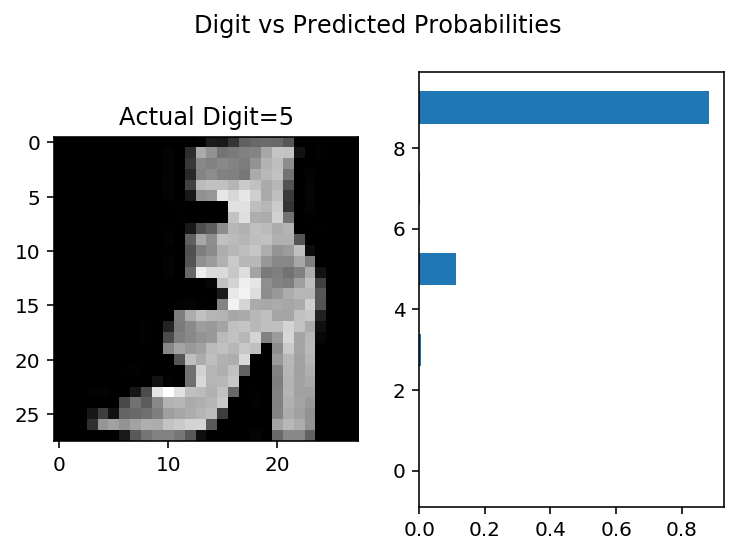

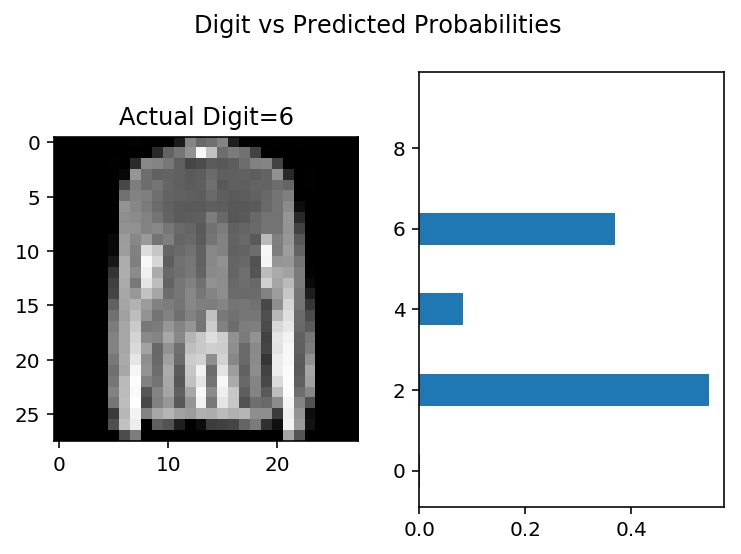

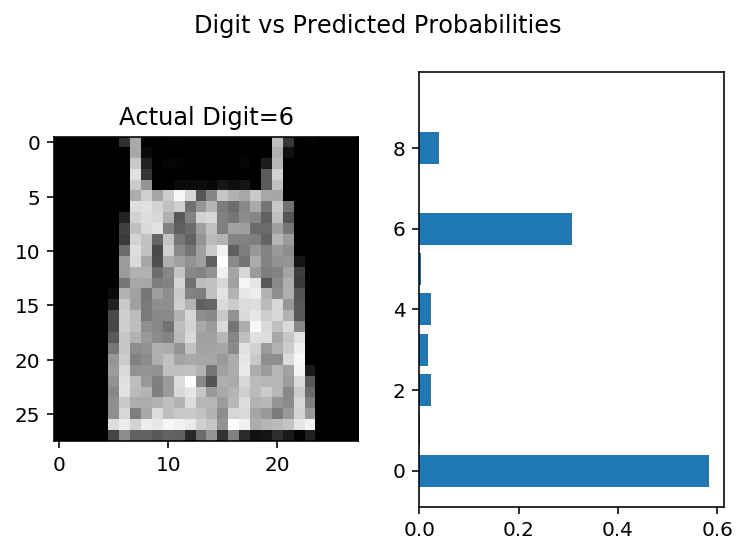

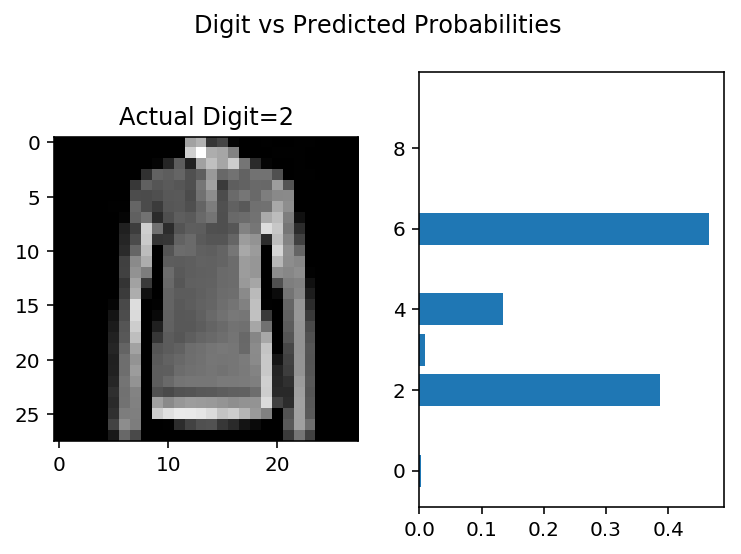

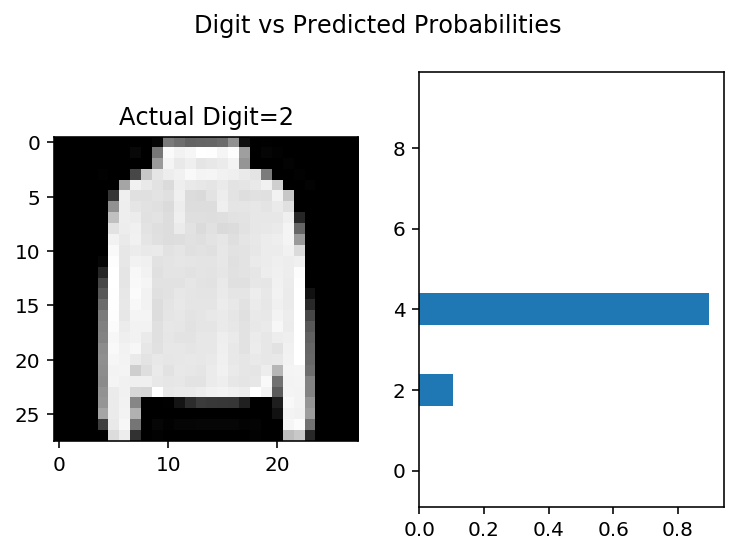

In [28]:
to_display = 5
with torch.no_grad():
  for images, labels in trainloader:
    # flatten image
    ps = torch.exp(model(images.view(images.shape[0], -1)))
    _, predicted_labels = ps.max(dim=1)
    for i in range(len(predicted_labels)):
      if(predicted_labels[i] != labels[i] and to_display > 0):
        to_display -=1
        view_classify(images[i].view(1,28,28), ps[i], actual_digit=labels[i])
      if to_display < 0:
        break